In [4]:
import pandas as pd
import numpy as np 

In [5]:
housing=pd.read_csv('housing.csv')

In [6]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

plotting the histogram to get to visualise the data once !

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

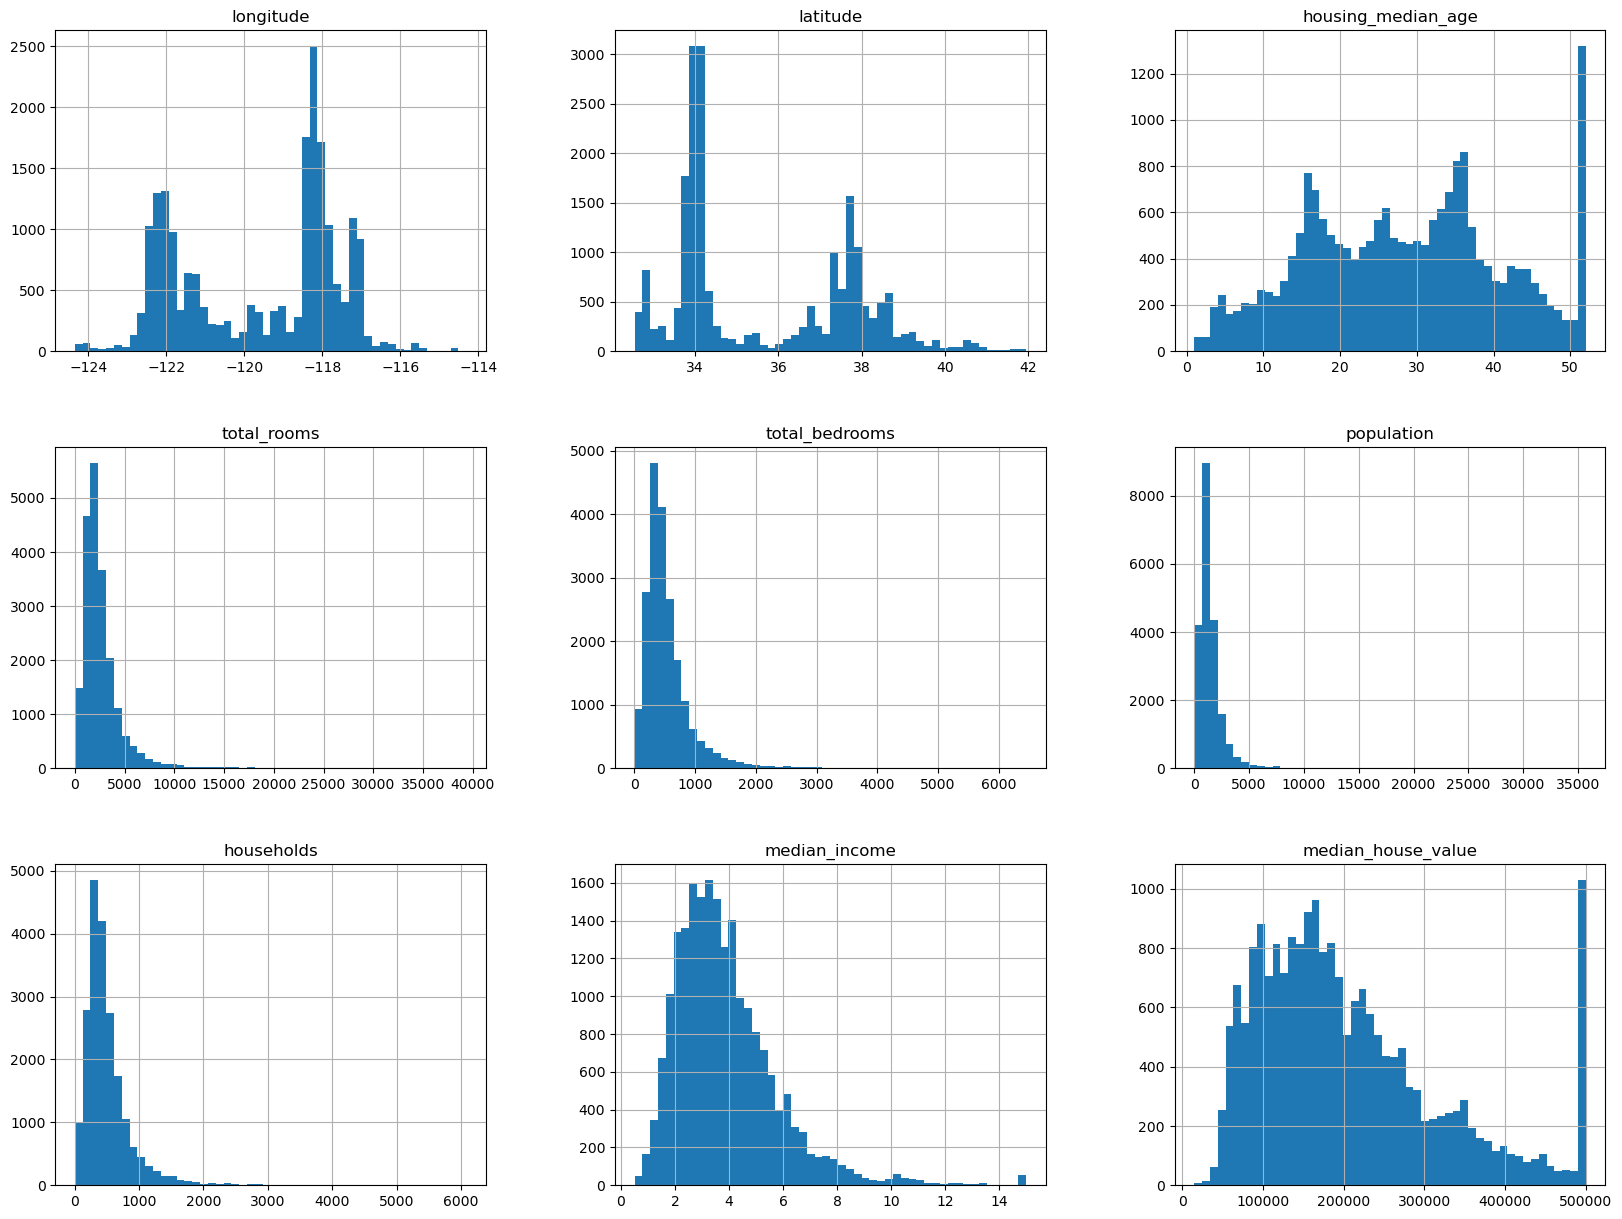

In [10]:
housing.hist(bins=50,figsize=(20,15))

creating a test set

In [11]:
# def spilt_train_test(data,test_ratio):
#     shuffled_indices= np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled_indices[:test_set_size]
#     train_indices=shuffled_indices[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
# train_set,test_set=spilt_train_test(housing,0.2)

In [13]:
# len(train_set),len(test_set)

using sklearn  set splitting 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

stratisfied shuffling--  

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

In [18]:
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## visualising the data 

<Axes: xlabel='longitude', ylabel='latitude'>

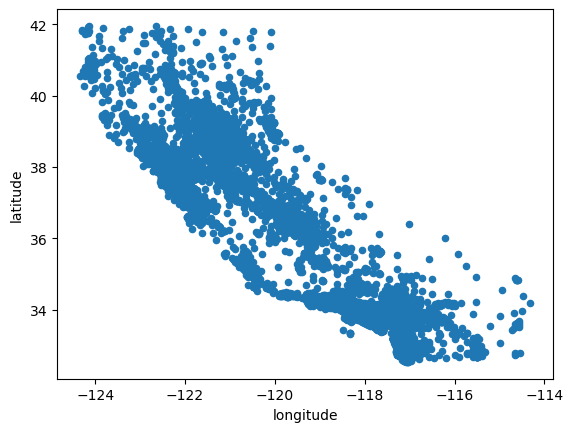

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

** setting alpha=0.1 to see the proper density of the houses

<Axes: xlabel='longitude', ylabel='latitude'>

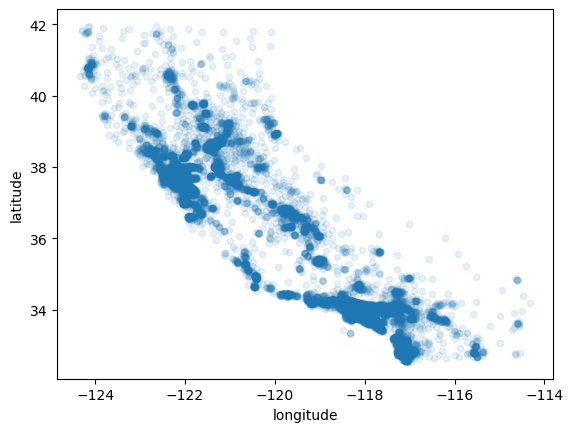

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

 The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

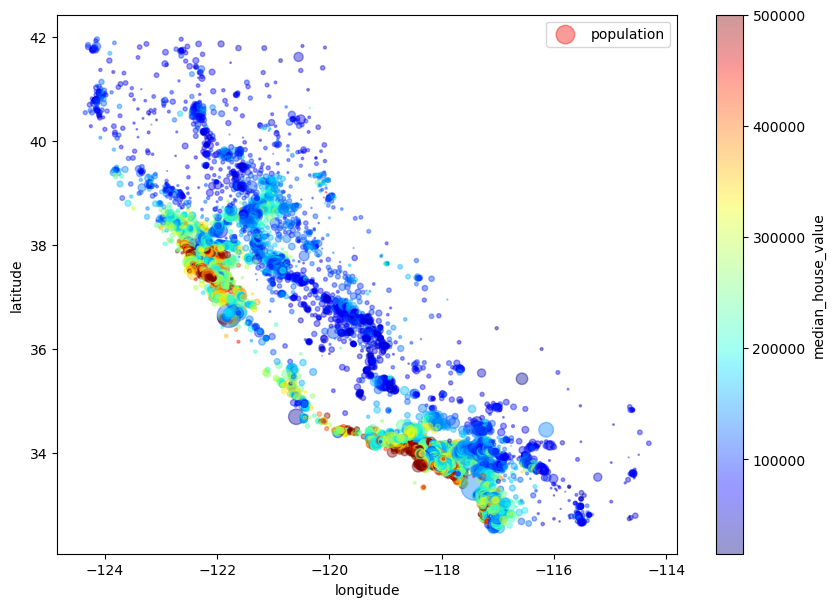

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)

plt.legend()

## looking for corelation

In [24]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [25]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

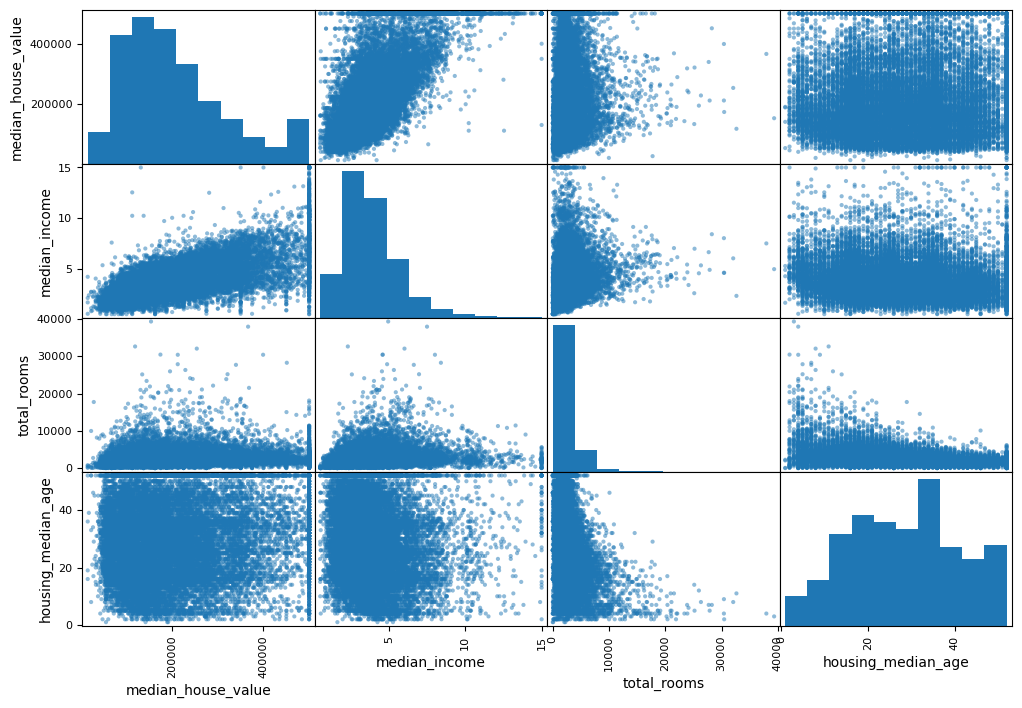

In [26]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

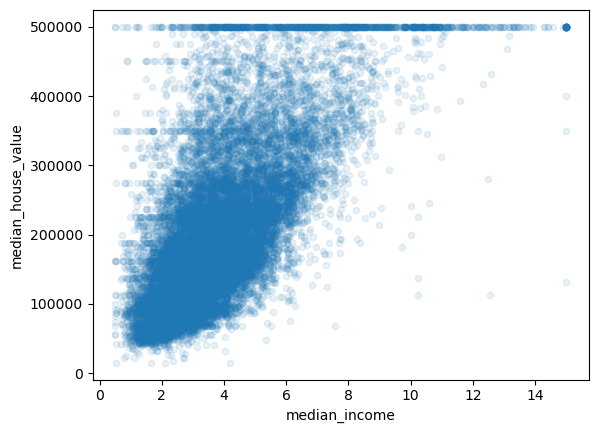

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

## experimenting with attribute combinations

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## reverting the changes 

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


## data cleaning

In [31]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

/var/folders/kb/dgvlq6h13qsgr5p3klzp3vz80000gn/T/ipykernel_6450/2198282036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


similar implementation with simple imputer library in sklearn

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer=SimpleImputer(strategy="median")

In [34]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
# since the simple imputers median only works on numeric data we are removing ocean_proximity from the dataset

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [39]:
X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

## handeling text and categorical attributes

In [42]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

now since these are categories that is limited options , and not a non arbitary text, we are using 


ordinal encoders to convert the text into numeric values 

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [44]:
# getting the list of catergories we tranformed 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1Hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1Hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [46]:
housing_cat_1Hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## custom Transformers

In [48]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

In [49]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
        def __init__(self,add_bedrooms_per_room=True):
                    self.add_bedrooms_per_room=add_bedrooms_per_room

        def fit(self,y=None):
                    return self
        
        def transform(self,x):
                rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
                population_per_household=X[:,population_ix]/X[:,households_ix]
                if self.add_bedrooms_per_room:
                        bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
                        return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
                else:
                      return np.c_[X,rooms_per_household,population_per_household]
            
        
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

## transformation pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])


housing_num_tr=num_pipeline.fit_transform(housing_num)

In [92]:
from sklearn.compose import ColumnTransformer
 
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])



In [93]:
housing_prepared=full_pipeline.fit_transform(housing)

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [64]:
some_data=housing.iloc[:5]
some_labels=housing.iloc[:5]



In [ ]:
some_data = housing.iloc[:5]  # Select first 5 entries
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

In [67]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [68]:
##the above model is not getting appropirate results 

## trying to use decision tree regressor


In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [70]:
housing_predictions=tree_reg.predict(housing_prepared)

In [71]:
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

using cross validation feature to find out the scores for the above model 

In [74]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

tree_rmse_scores=np.sqrt(-scores)

In [75]:
def display_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [76]:
display_scores(tree_rmse_scores)

scores [72233.07984668 71123.74565191 68161.50775262 72039.56533568
 70581.00368771 77169.97875162 70917.80085719 72976.03117394
 68420.98357237 70903.90908117]
mean 71452.76057108944
standard deviation 2396.6606492400833


computing the same scores for the linear regression model

In [77]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean 69104.07998247066
standard deviation 2880.328209818069


In [78]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [80]:
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

np.float64(0.0)

In [81]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores [51057.42228483 49011.12668055 46948.3813063  51870.55909027
 47448.2682111  52013.26156939 52899.74081054 49810.30933796
 48503.77659859 54286.62393076]
mean 50384.946982028814
standard deviation 2303.223920468358


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [85]:

cvres = grid_search.cv_results_


for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63571.40870739788 {'max_features': 2, 'n_estimators': 3}
55681.68109441628 {'max_features': 2, 'n_estimators': 10}
52810.095398351004 {'max_features': 2, 'n_estimators': 30}
59877.58307237515 {'max_features': 4, 'n_estimators': 3}
52528.0287893818 {'max_features': 4, 'n_estimators': 10}
50591.62869804744 {'max_features': 4, 'n_estimators': 30}
58059.26698136127 {'max_features': 6, 'n_estimators': 3}
52269.14432277342 {'max_features': 6, 'n_estimators': 10}
49976.11918862772 {'max_features': 6, 'n_estimators': 30}
58533.99687975512 {'max_features': 8, 'n_estimators': 3}
51944.62195161201 {'max_features': 8, 'n_estimators': 10}
50178.165979585036 {'max_features': 8, 'n_estimators': 30}
62203.50506040234 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54593.29502035064 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60140.25926399882 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53076.110243471405 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

## ANALYZE THE BEST MODELS AND THEIR ERRORS 

In [87]:
#THIS SHOWS THE RELATIVE IMPORTANCE OF EACH ATTRIBUTE 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.32916016e-02, 7.61250236e-02, 4.28756515e-02, 1.68092993e-02,
       1.61767539e-02, 1.70990597e-02, 1.61530263e-02, 2.93188071e-01,
       7.99948046e-02, 1.09293392e-01, 7.82624241e-02, 1.23659225e-02,
       1.49668934e-01, 4.79607603e-05, 3.26136209e-03, 5.38671217e-03])

In [88]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.29318807122368706), 'median_income'),
 (np.float64(0.149668934351525), 'INLAND'),
 (np.float64(0.10929339232667132), 'pop_per_hhold'),
 (np.float64(0.08329160160071507), 'longitude'),
 (np.float64(0.07999480464616836), 'rooms_per_hhold'),
 (np.float64(0.07826242410616922), 'bedrooms_per_room'),
 (np.float64(0.07612502360550034), 'latitude'),
 (np.float64(0.04287565149199503), 'housing_median_age'),
 (np.float64(0.017099059687529783), 'population'),
 (np.float64(0.016809299254098083), 'total_rooms'),
 (np.float64(0.016176753900092912), 'total_bedrooms'),
 (np.float64(0.01615302627015502), 'households'),
 (np.float64(0.012365922521528634), '<1H OCEAN'),
 (np.float64(0.005386712168133465), 'NEAR OCEAN'),
 (np.float64(0.003261362085710889), 'NEAR BAY'),
 (np.float64(4.7960760319815864e-05), 'ISLAND')]

## EVALUATE YOUR MODEL AND TEST

In [90]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()


In [ ]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

## now launch monitor and maintain your system

one way to save it is using scikit-learn (joblib)

then load and use it in our production env using predict()